In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Activation
from keras.layers import Convolution2D,MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist
# Load pre-shuffled MNIST data into train and test sets
(X_train,_train),(X_test,y_test) = mnist.load_data()
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


# from keras import backend as K
# K.set_image_dim_ordering('th')

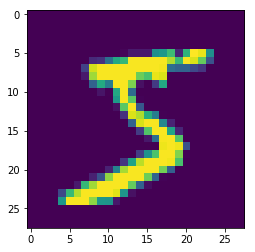

In [2]:
from matplotlib import pyplot as plt
plt.imshow(X_train[0])

In [22]:
X_train = X_train.reshape(X_train.shape[0],28,28,1)
X_test = X_test.reshape(X_test.shape[0],28, 28,1)

In [23]:
print( X_train.shape)
print( y_train.shape)

(60000, 28, 28, 1)
(60000,)


In [24]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [25]:
y_train[0]

5

In [26]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [27]:
print(Y_train.shape)
Y_train[0]

(60000, 10)


array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [82]:
X_train=X_train[:10000]
X_test = X_test[:1000]
print(X_train.shape)
print(X_test.shape)

(10000, 28, 28, 1)
(1000, 28, 28, 1)


In [83]:
Y_train=Y_train[:10000]
Y_test=Y_test[:1000]
print(Y_train.shape)
print(Y_test.shape)

(10000, 10)
(1000, 10)


In [69]:
model = Sequential()

In [70]:
model.add(Convolution2D(32,3,3, activation='relu',input_shape=(28,28,1)))
print(model.output_shape)
print(model.output.shape)

(None, 26, 26, 32)
(?, 26, 26, 32)


/home/saivinay/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1..., activation="relu")`
  if __name__ == '__main__':


In [71]:
model.add(Convolution2D(32,3,3,activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

/home/saivinay/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  if __name__ == '__main__':


In [72]:
model.add(Dropout(0.25))

In [73]:
print(model.output_shape)

(None, 12, 12, 32)


In [74]:
model.add(Flatten())
print(model.output_shape)

(None, 4608)


In [75]:
model.add(Dense(128,activation='relu'))
print(model.output_shape)

(None, 128)


In [76]:
model.add(Dropout(0.5))
# Dropout consists in randomly setting a fraction rate of input units to 0 at each update during training time, which helps prevent overfitting.

print(model.output_shape)

(None, 128)


In [77]:
model.add(Dense(10,activation='softmax'))
print(model.output_shape)

(None, 10)


In [78]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [79]:
model.fit(X_train,Y_train,batch_size=32,nb_epoch=10,verbose=1)

/home/saivinay/anaconda3/lib/python3.5/site-packages/keras/models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/10
10000/10000 [==============================] - 18s 2ms/step - loss: 1.5221 - acc: 0.4785
Epoch 2/10
10000/10000 [==============================] - 18s 2ms/step - loss: 0.5849 - acc: 0.8169
Epoch 3/10
10000/10000 [==============================] - 18s 2ms/step - loss: 0.4940 - acc: 0.8506
Epoch 4/10
10000/10000 [==============================] - 18s 2ms/step - loss: 0.4645 - acc: 0.8568
Epoch 5/10
10000/10000 [==============================] - 18s 2ms/step - loss: 0.4268 - acc: 0.8662
Epoch 6/10
10000/10000 [==============================] - 18s 2ms/step - loss: 0.4182 - acc: 0.8705
Epoch 7/10
10000/10000 [==============================] - 18s 2ms/step - loss: 0.3854 - acc: 0.8796
Epoch 8/10
10000/10000 [==============================] - 19s 2ms/step - loss: 0.3687 - acc: 0.8853
Epoch 9/10
10000/10000 [==============================] - 18s 2ms/step - loss: 0.3527 - acc: 0.8900
Epoch 10/10
10000/10000 [==============================] - 18s 2ms/step - loss: 0.3464 - acc: 0.8905

In [84]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [85]:
print(score)
#loss,accuracy

[0.23592019534111022, 0.926]
